In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
## save figures to this directory
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/02_figures/ASK_joint/'

In [3]:
## plotting settings
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['pdf.fonttype'] = 42

## (I) coarse grained cell type level

In [4]:
comparisons = ['OVERALL','IPF','HEALTHY']

(15, 14)


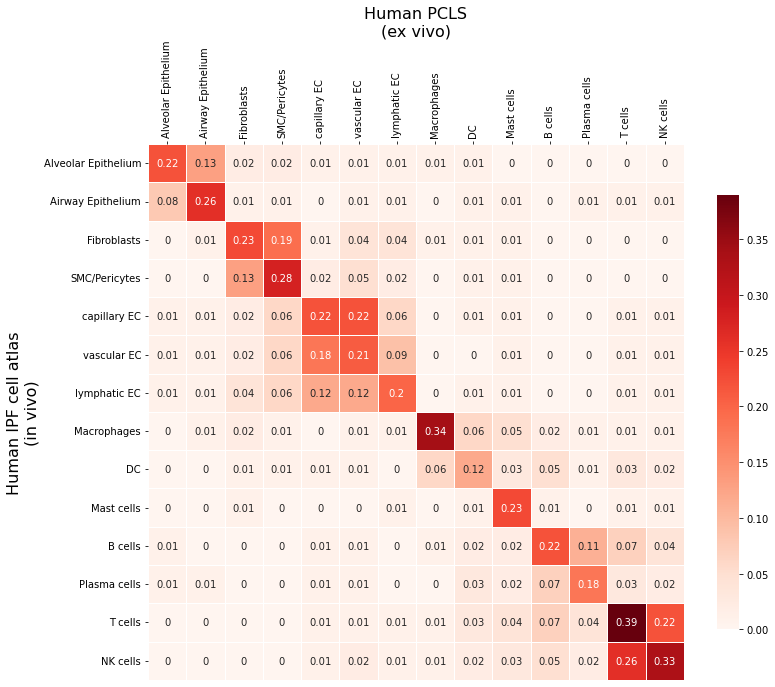

(15, 14)


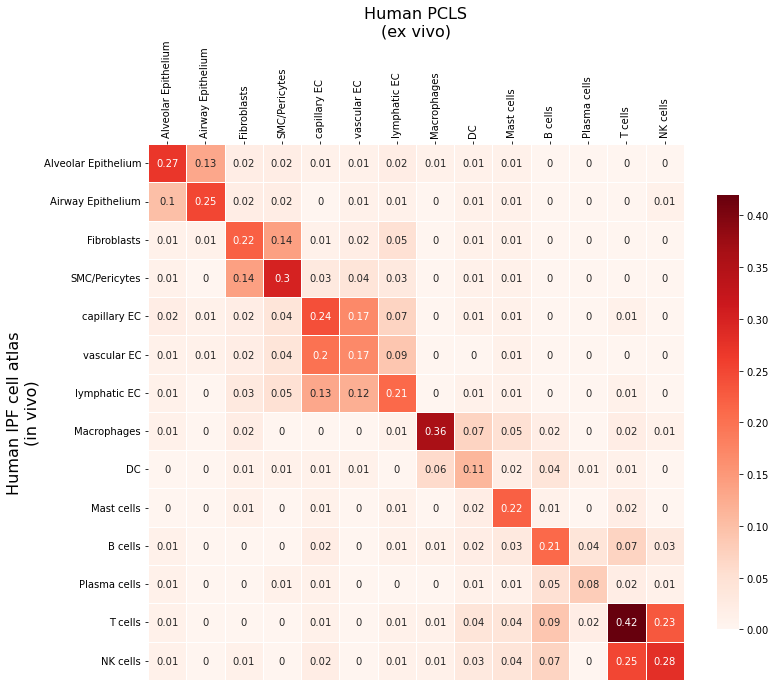

(15, 14)


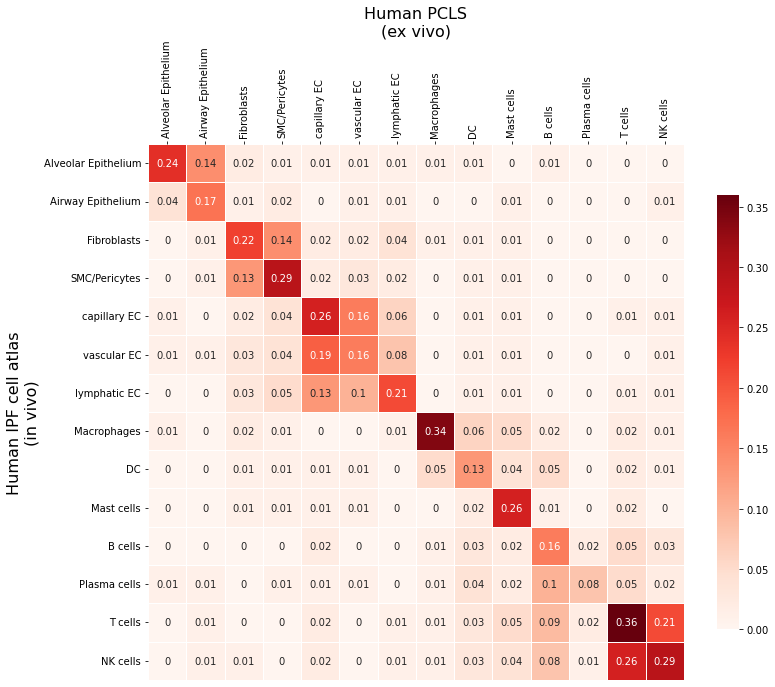

In [5]:
for c in comparisons:
    ## read data
    scores = pd.read_csv('/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/01_data/ASK_joint/210111_matchSCore_cell_type_group_' + c + '.csv', index_col = 0)
    print(scores.shape)
    
    ## reformat data: rearrange columns
    scores = scores[['Alveolar Epithelium','Airway Epithelium','Fibroblasts','SMC/Pericytes','capillary EC','vascular EC','lymphatic EC',
                     'Macrophages','DC','Mast cells','B cells','Plasma cells','T cells','NK cells']]
    
    ## reformat data: rearrange rows
    scores = scores.reindex(['Alveolar Epithelium','Airway Epithelium','Fibroblasts','SMC/Pericytes','capillary EC','vascular EC','lymphatic EC',
                             'Macrophages','DC','Mast cells','B cells','Plasma cells','T cells','NK cells'])
    
    ## round values in similiarity matrix
    scores = scores.round(decimals=2)
    
    ## plot heatmap
    # heatmap arguments
    cbar_kws = {'shrink': 0.8,
               'extendfrac':.2} 
    # plot heatmap
    p = sb.heatmap(scores, annot=True, square=True,
                   #vmin=0, vmax=0.24,center=0, 
                   cmap='Reds', cbar_kws=cbar_kws,
                   linewidths=1, linecolor='white')
    p.xaxis.set_ticks_position('top')
    p.set_xticklabels(p.get_xticklabels(),rotation=90)
    p.set_xlabel('Human PCLS\n(ex vivo)', size = 16)
    p.xaxis.set_label_position('top') 
    p.set_ylabel('Human IPF cell atlas\n(in vivo)', size = 16)
    plt.savefig(fig_dir + '220112_matchSCore_cell_type_groups_heatmap_' + c + '.pdf',dpi=300,bbox_inches='tight')
    plt.show()